## Observations and Insights 

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

--The line plot of time point versus tumor volume for a mouse(b128) treated with Capomulin shows that as timepoint increases, tumor volume decreases

--The scatter plot of mouse weight versus average tumor volume for the Capomulin regimen shows that the average tumor volume is positively correlated with increasing weight

--The values for the final tumor volumes of mice in the "Infubinol" and "Ceftamin" regimens were generally higher than the final tumor volume of mice from the "Capomulin" and "Ramicane" regimens. 

 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata, on="Mouse ID")
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
combined_data["Mouse ID"].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicates["Mouse ID"]

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info=combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean=combined_data.loc[combined_data["Mouse ID"]!="g989",:]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_grps=clean.groupby("Drug Regimen")
#regimen_grps["Drug Regimen"].value_counts()

mean=regimen_grps["Tumor Volume (mm3)"].mean()
median=regimen_grps["Tumor Volume (mm3)"].median()
variance=regimen_grps["Tumor Volume (mm3)"].var()
st_dev=regimen_grps["Tumor Volume (mm3)"].std()
SEM=regimen_grps["Tumor Volume (mm3)"].std()

summary_table=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"St. Deviation":st_dev,"SEM":SEM})
summary_table


,Mean,Median,Variance,St. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419,7.710419


## Bar Plots

Text(0, 0.5, 'Number of Data Points')

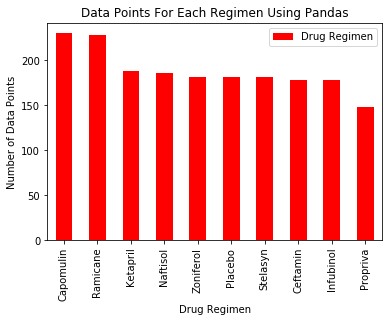

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pandas_count=pd.DataFrame(clean["Drug Regimen"].value_counts())
pandas_count
pandas_count.plot(kind="bar",color="r")
plt.title("Data Points For Each Regimen Using Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

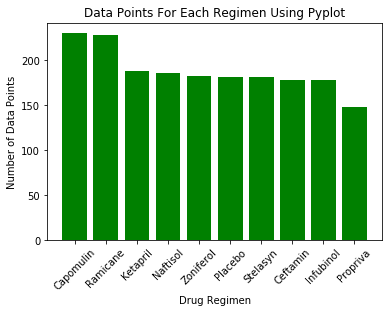

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count=clean["Drug Regimen"].value_counts()
regimen=count.keys()
plt.bar(regimen,count,color="g",align="center")
plt.xticks(rotation=45)
plt.title("Data Points For Each Regimen Using Pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

Text(0.5, 1.0, 'Pie plot showing the distribution of female versus male mice using pandas')

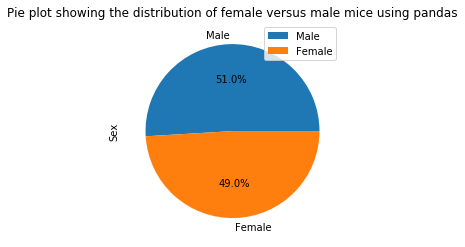

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_gender=pd.DataFrame(clean["Sex"].value_counts())
pandas_gender
pandas_gender.plot(kind="pie",subplots=True, autopct="%1.1f%%")
plt.title("Pie plot showing the distribution of female versus male mice using pandas")


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

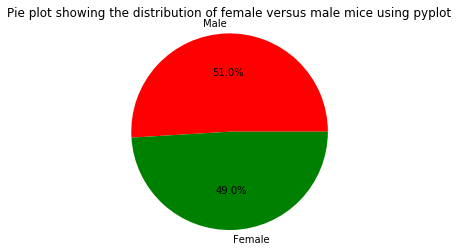

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt_gender=clean["Sex"].value_counts()
labels=["Male","Female"]
colors=["red","green"]
plt.pie(plt_gender,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Pie plot showing the distribution of female versus male mice using pyplot")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
most_promising=clean.loc[(clean["Drug Regimen"]=="Capomulin")|(clean["Drug Regimen"]=="Ramicane")|
                       (clean["Drug Regimen"]=="Infubinol")|(clean["Drug Regimen"]=="Ceftamin"),:]

final_volume=most_promising.loc[most_promising["Timepoint"]==45]
tumor_vol=final_volume["Tumor Volume (mm3)"]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume is: 33.48002734
The upper quartile of Tumor Volume is: 62.14221369
The interquartile range of Tumor Volume is: 28.66218635
The the median of Tumor Volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x262b0b268c8>,
 'caps': [<matplotlib.lines.Line2D at 0x262b0b26f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x262b0b20fc8>,
 'medians': [<matplotlib.lines.Line2D at 0x262b0b2cec8>,
 'fliers': [<matplotlib.lines.Line2D at 0x262b0b2cfc8>,
 'means': []}

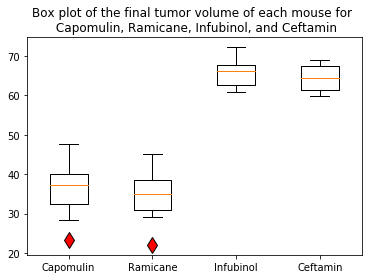

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin=final_volume.loc[(final_volume["Drug Regimen"]=="Capomulin"),:]
Capomulin_vol=Capomulin["Tumor Volume (mm3)"]


Ramicane=final_volume.loc[(final_volume["Drug Regimen"]=="Ramicane"),:]
Ramicane_vol=Ramicane["Tumor Volume (mm3)"]

Infubinol=final_volume.loc[(final_volume["Drug Regimen"]=="Infubinol"),:]
Infubinol_vol=Infubinol["Tumor Volume (mm3)"]

Ceftamin=final_volume.loc[(final_volume["Drug Regimen"]=="Ceftamin"),:]
Ceftamin_vol=Ceftamin["Tumor Volume (mm3)"]

data=[Capomulin_vol,Ramicane_vol,Infubinol_vol,Ceftamin_vol]

fig1, ax1 = plt.subplots()
flierprops = dict(marker='d', markerfacecolor='red', markersize=12,linestyle='none')#this sets color and shape of outliers
ax1.set_title('Box plot of the final tumor volume of each mouse for \n Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.boxplot(data, labels=["Capomulin", "Ramicane", "Infubinol","Ceftamin"],whis=True, flierprops=flierprops)



## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_list=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin",:]
print(capomulin_list["Mouse ID"].unique())


['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


Enter a mouse ID: b128


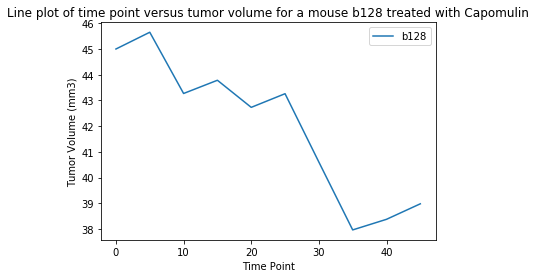

In [85]:
mouse_id=input("Enter a mouse ID: ")
capomulin_mouse=capomulin_list.loc[capomulin_list["Mouse ID"]==mouse_id,:]
mouse_data=capomulin_mouse[["Timepoint","Tumor Volume (mm3)"]]

selection,=plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"],label=mouse_id)
plt.title(f"Line plot of time point versus tumor volume for a mouse {mouse_id} treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[selection],loc="best")


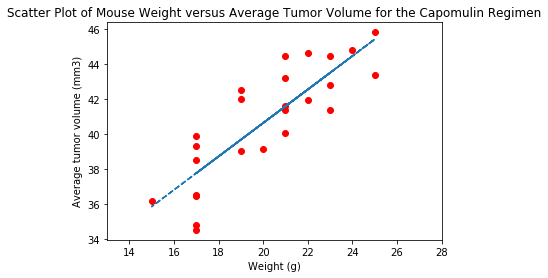

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_grp=capomulin_list.groupby(["Mouse ID"])
data=cap_grp[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(data["Weight (g)"],data["Tumor Volume (mm3)"],marker="o",facecolors="red")
plt.xlim(13,28)
plt.title("Scatter Plot of Mouse Weight versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.plot(data["Weight (g)"],regress_values,"--")


## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(data["Weight (g)"], data["Tumor Volume (mm3)"])
regress_values =data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'